# <p style="text-align: center;">FASHION CLASSIFICATION - DEEP LEARNING PROJECT</p>

## Import Libraries and Datasets

In [1]:
# Import the required libraries for the project
import matplotlib.pyplot as plt   # Matplotlib is a plotting library used for data visualization.
import tensorflow as tf   # TensorFlow is the deep learning library used for building and training models.
import numpy as np   # NumPy is a fundamental package for numerical computations in Python.

In [2]:
# Load the Fashion MNIST dataset and split it into training and test sets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# Display the shape of the training data (X_train)
X_train.shape

(60000, 28, 28)

In [4]:
# Check the shape of the y_train variable
y_train.shape

(60000,)

In [5]:
# Check the shape of the test data (X_test)
X_test.shape

(10000, 28, 28)

In [6]:
# Check the shape of the test labels (y_test)
y_test.shape

(10000,)

In [7]:
# Display the test labels (y_test)
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

## Perform Data Visualization

3


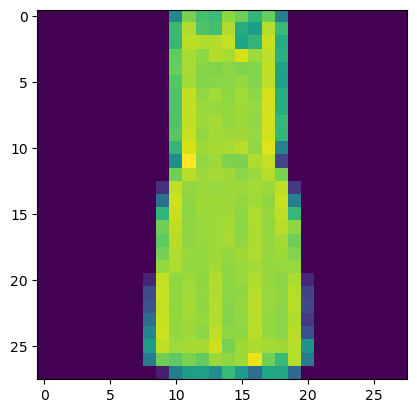

In [8]:
# Set the index 'i' to 30000
i = 30000

# Display the image at index 'i' from the training data (X_train)
plt.imshow(X_train[i])

# Print the corresponding label for the image at index 'i' from the training labels (y_train)
print(y_train[i])

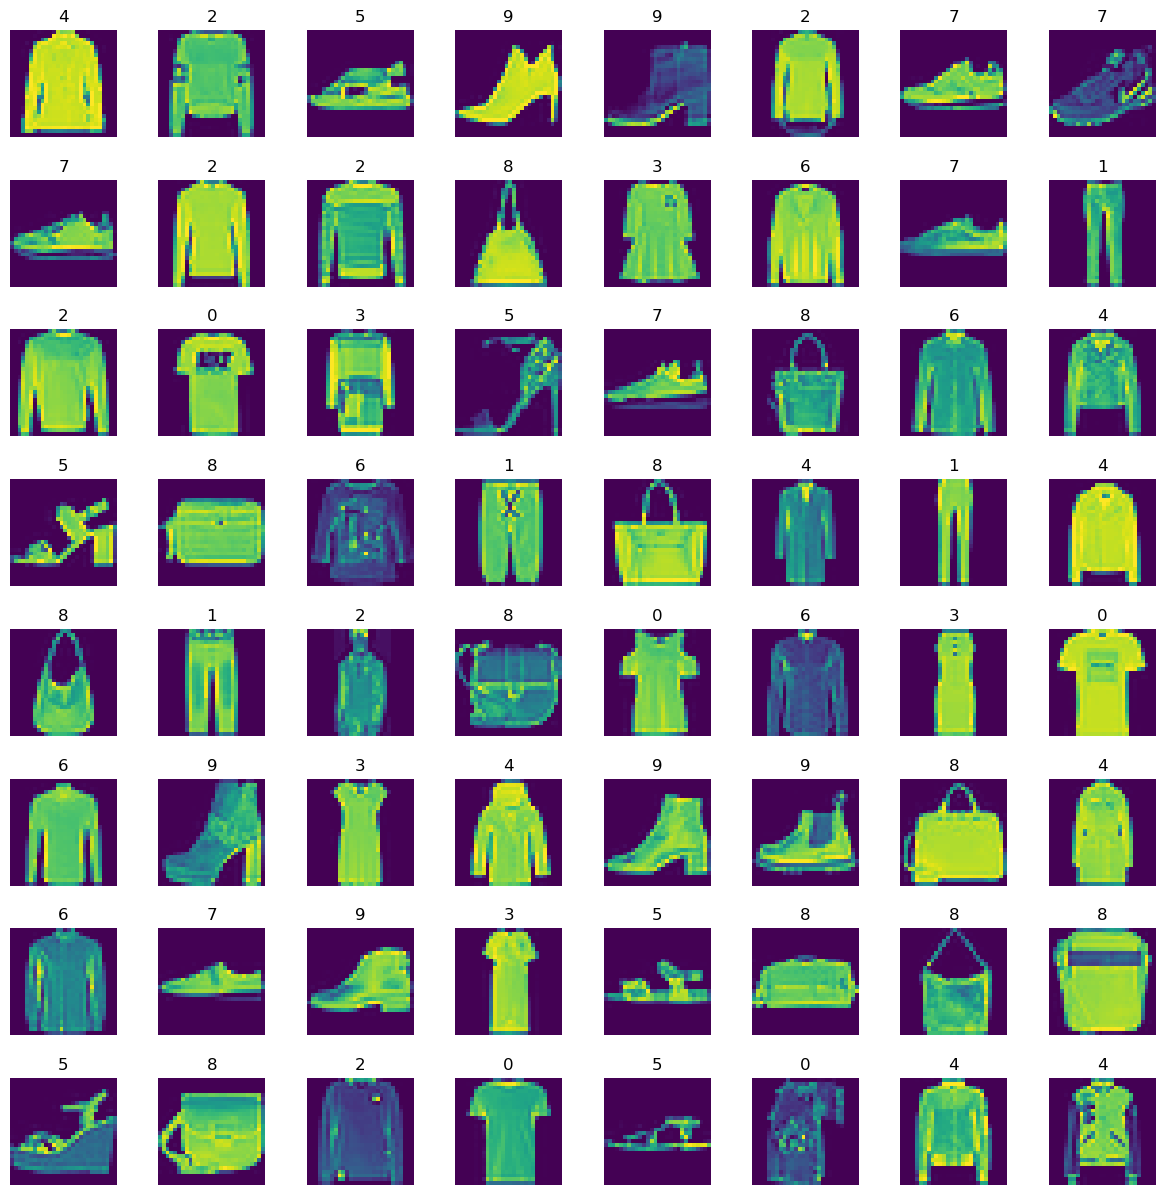

In [9]:
# The 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

# Set the number of rows (L_grid) and columns (W_grid) in the subplot grid
W_grid = 8
L_grid = 8

# Create a new figure with a grid of subplots and specify the size of the figure
fig, axes = plt.subplots(L_grid, W_grid, figsize=(15, 15))

# Flatten the 2D grid of subplots into a 1D array for easier iteration
axes = axes.ravel()

# Determine the total number of training samples
n_training = len(X_train)

# Randomly select training samples and display them in the subplots
for i in np.arange(0, L_grid * W_grid):
    # Generate a random index within the range of the training data
    index = np.random.randint(0, n_training)
    
    # Display the image corresponding to the selected index in the subplot
    axes[i].imshow(X_train[index])
    
    # Set the title of the subplot to be the label (category) of the displayed image
    axes[i].set_title(y_train[index])
    
    # Hide the axis (remove the axis ticks and labels) for better visualization
    axes[i].axis('off')

# Adjust the vertical spacing between subplots to avoid overlapping titles
plt.subplots_adjust(hspace=0.4)

Here's what each part of the code does:

1. `W_grid` and `L_grid` are variables representing the number of columns and rows in the grid of subplots, respectively. This will determine how many images are displayed in the final grid.

2. `fig, axes = plt.subplots(L_grid, W_grid, figsize=(15, 15))`: This line creates a new figure and a grid of subplots based on the specified number of rows and columns. The `figsize` parameter sets the size of the entire figure in inches.

3. `axes = axes.ravel()`: The `axes` object is reshaped into a 1-dimensional array using `ravel()` to simplify the iteration process later.

4. `n_training = len(X_train)`: `n_training` is the total number of training samples available in the dataset, stored in `X_train`.

5. The subsequent `for` loop runs through the grid of subplots (`L_grid` * `W_grid`) and performs the following steps:

>a. `index = np.random.randint(0, n_training)`: A random index within the range of the training data is generated using `numpy.random.randint()` to select a random sample from the dataset.

>b. `axes[i].imshow(X_train[index])`: The image corresponding to the randomly selected index is displayed in the i-th subplot using `imshow()`.

>c. `axes[i].set_title(y_train[index])`: The title of the subplot is set to the label (category) of the displayed image. `y_train` contains the corresponding labels for each image in `X_train`.

>d. `axes[i].axis('off')`: This hides the axis ticks and labels for each subplot, resulting in a cleaner visualization without axis lines.

6. `plt.subplots_adjust(hspace=0.4)`: This adjusts the vertical spacing between the subplots to prevent overlapping titles and improve the overall appearance of the visualization.

Overall, the code provides a visual representation of random fashion images with their corresponding labels, helping to get an idea of the dataset and potentially identify patterns or insights.

## Prepare the Data for Training

In [10]:
# Check the shape of the training labels (y_train)
y_train.shape

(60000,)

In [11]:
# Set the number of categories (classes) in the dataset
number_cat = 10

# Convert the labels (y_train) to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, number_cat)

Explanation:

1. `number_cat = 10`: This line sets the variable `number_cat` to the number of categories (classes) present in the dataset. In this context, it means there are 10 different classes of fashion items in the dataset.

2. `y_train = tf.keras.utils.to_categorical(y_train, number_cat)`: This line performs one-hot encoding on the `y_train` labels, converting them from their original integer form to one-hot encoded vectors. One-hot encoding is a process used to represent categorical variables as binary vectors, where each vector has a length equal to the number of categories. Each element of the vector is set to 1 at the index corresponding to the category, while all other elements are set to 0.

For example, let's assume the original `y_train` looked like this before one-hot encoding:  
`[2, 5, 8, 1, 3, 5, 6, 3, 2, 0]`

After applying `tf.keras.utils.to_categorical(y_train, number_cat)`, it will be transformed into one-hot encoded form:  
`[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0], # Represents class 2`  
 `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # Represents class 5`  
 `[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # Represents class 8`  
 `[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # Represents class 1`  
 `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # Represents class 3`  
 `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # Represents class 5`  
 `[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # Represents class 6`  
 `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # Represents class 3`  
 `[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # Represents class 2`  
 `[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]  # Represents class 0`  

The `y_train` labels are now in a format suitable for training deep learning models, especially when using categorical cross-entropy loss, as the one-hot encoded vectors serve as ground truth labels for each sample during model training.

In [12]:
# Check the shape of the target labels for the training data (y_train)
y_train.shape

(60000, 10)

In [13]:
# Print the target labels for the training data (y_train)
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
# Check the training data (X_train)
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [15]:
# Check the shape of the training data (X_train)
X_train.shape

(60000, 28, 28)

In [16]:
# Convert the target labels for the test data (y_test) into one-hot encoded format
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [17]:
# Check the true labels of the test data (y_test)
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
# Expand the dimensions of X_train along the last axis (axis=-1)
X_train = np.expand_dims(X_train, axis=-1)

Explanation:

`np.expand_dims(X_train, axis=-1)`: The `np.expand_dims()` function is used to add an extra dimension to the `X_train` array along the last axis (axis=-1). The `axis=-1` parameter specifies the last axis of the array, which is typically the channel axis in the context of image data.

The effect of `np.expand_dims(X_train, axis=-1)` is to convert a 3-dimensional array (representing grayscale images) into a 4-dimensional array, where the new added dimension represents the number of channels. This is commonly required when dealing with image data in deep learning models, as many deep learning frameworks, including TensorFlow and Keras, expect input images to have a channel dimension even if the image is grayscale.

For example, `X_train` initially had the shape `(60000, 28, 28)` representing 60,000 grayscale images of size 28x28 pixels. After applying `np.expand_dims(X_train, axis=-1)`, the shape would become `(60000, 28, 28, 1)`. Here, the last dimension with size 1 represents the single channel (grayscale) for each image.

Having the correct input shape with the channel dimension is essential for feeding the data into deep learning models that expect input in the form of batches with image width, height, and channels.

What if we have a color image? The dimension will be 28 by 28 by 3. The number 3 indicates three channels for RGB(Red, Green and Blue).

In [19]:
# Check the shape of the training data (X_train)
X_train.shape

(60000, 28, 28, 1)

## Build a Deep Learning Model

In [20]:
# Import the required libraries
from tensorflow.keras import datasets, layers, models

# Create a sequential model (a linear stack of layers) for the Convolutional Neural Network (CNN)
cnn = models.Sequential()

# Add a 2D convolutional layer with 32 filters, each of size (3, 3), and ReLU activation function.
# Specify the input shape as (28, 28, 1) to match the shape of the input images.
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a max-pooling layer with a pool size of (2, 2) to downsample the feature maps.
cnn.add(layers.MaxPooling2D(2, 2))

# Add another 2D convolutional layer with 64 filters, each of size (3, 3), and ReLU activation function.
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add another max-pooling layer with a pool size of (2, 2).
cnn.add(layers.MaxPooling2D(2, 2))

# Add one more 2D convolutional layer with 64 filters, each of size (3, 3), and ReLU activation function.
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D output tensor of the convolutional layers into a 1D vector to connect to dense layers.
cnn.add(layers.Flatten())

# Add a fully connected (dense) layer with 64 units and ReLU activation function.
cnn.add(layers.Dense(64, activation='relu'))

# Add the output layer with 10 units and a softmax activation function for multiclass classification.
# The softmax activation function assigns probabilities to each class (summing up to 1).
cnn.add(layers.Dense(10, activation='softmax'))

# Display a summary of the CNN architecture, showing the number of parameters and the output shape of each layer.
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

__Explanation about the code:__

1. `from tensorflow.keras import datasets, layers, models`: This line imports the required modules from the TensorFlow Keras API, which provides an easy and high-level interface for building neural network models.

2. `cnn = models.Sequential()`: This creates a sequential model `cnn`, which is a linear stack of layers, where each layer has exactly one input tensor and one output tensor.

3. `cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))`: This adds a 2D convolutional layer to the model with 32 filters (output channels), each of size (3, 3). The ReLU activation function is used, and the input shape is set to (28, 28, 1) to match the shape of the grayscale input images.

4. `cnn.add(layers.MaxPooling2D(2, 2))`: This adds a max-pooling layer to the model with a pool size of (2, 2). Max-pooling helps reduce the spatial dimensions of the feature maps and capture important information while discarding less relevant details.

5. `cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))`: Another 2D convolutional layer with 64 filters and ReLU activation is added to the model.

6. `cnn.add(layers.MaxPooling2D(2, 2))`: Another max-pooling layer is added after the second convolutional layer to further downsample the feature maps.

7. `cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))`: A third 2D convolutional layer with 64 filters and ReLU activation is added.

8. `cnn.add(layers.Flatten())`: The `Flatten()` layer is used to flatten the 3D output tensor of the convolutional layers into a 1D vector. This prepares the data for the fully connected layers.

9. `cnn.add(layers.Dense(64, activation='relu'))`: A fully connected (dense) layer with 64 units and ReLU activation is added. This layer learns complex patterns from the flattened features.

10. `cnn.add(layers.Dense(10, activation='softmax'))`: The output layer is added with 10 units, one for each class in the dataset. The softmax activation function is used, which converts the raw output scores into probabilities representing the likelihood of each class.

11. `cnn.summary()`: This displays a summary of the CNN architecture, showing the number of parameters and the output shape of each layer. It provides a helpful overview of the model's structure and parameter count, which is useful for debugging and optimizing the network design.

---
__Explanation about the result:__

1. `Model: "sequential"`: This line indicates that the model is a sequential model, where layers are stacked sequentially.

2. `Layer (type) Output Shape Param #`: The header of the table provides information about each layer in the model. It lists the layer type, the output shape of each layer, and the number of parameters (weights and biases) associated with each layer.

3. `conv2d_3 (Conv2D) (None, 26, 26, 32) 320`: This line represents the first convolutional layer (Conv2D) in the model. It has 32 filters of size (3, 3), resulting in an output shape of (None, 26, 26, 32). The number of parameters in this layer is 320.

4. `max_pooling2d_2 (MaxPooling (None, 13, 13, 32) 0 2D)`: The first max-pooling layer (MaxPooling2D) follows the first convolutional layer. It downsamples the output of the first convolutional layer, resulting in an output shape of (None, 13, 13, 32). Max-pooling layers do not have trainable parameters, so the parameter count is 0.

5. `conv2d_4 (Conv2D) (None, 11, 11, 64) 18496`: This line represents the second convolutional layer with 64 filters of size (3, 3). It results in an output shape of (None, 11, 11, 64). The number of parameters in this layer is 18,496.

6. `max_pooling2d_3 (MaxPooling (None, 5, 5, 64) 0 2D)`: The second max-pooling layer follows the second convolutional layer. It downsamples the output of the second convolutional layer, resulting in an output shape of (None, 5, 5, 64). It also has 0 parameters.

7. `conv2d_5 (Conv2D) (None, 3, 3, 64) 36928`: This line represents the third convolutional layer with 64 filters of size (3, 3). It results in an output shape of (None, 3, 3, 64). The number of parameters in this layer is 36,928.

8. `flatten_1 (Flatten) (None, 576) 0`: The Flatten layer converts the 3D tensor into a 1D vector of shape (None, 576) to prepare for the fully connected layers. It has 0 parameters.

9. `dense_2 (Dense) (None, 64) 36928`: The first fully connected (dense) layer with 64 units is added. It results in an output shape of (None, 64). The number of parameters in this layer is 36,928.

10. `dense_3 (Dense) (None, 10) 650`: The output layer with 10 units (representing the 10 classes) is added. It uses the softmax activation function to produce class probabilities. The number of parameters in this layer is 650.

11. `Total params: 93,322`: This line shows the total number of trainable parameters in the entire model.

12. `Trainable params: 93,322`: This line shows the number of trainable parameters that will be updated during model training. It includes all the weights and biases in the model.

13. `Non-trainable params: 0`: This line shows the number of non-trainable parameters, which are usually present in certain layers that don't have learnable parameters, like the max-pooling layers in this case. Since they don't get updated during training, their count is 0.

## Compile and Train the Model

In [21]:
# Compile the CNN model with the RMSprop optimizer, categorical cross-entropy loss, and accuracy metric.
# Use the legacy RMSprop optimizer to avoid the deprecation warning.
cnn.compile(optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

Explanation:

1. `cnn.compile(...)`: This line compiles the previously defined Convolutional Neural Network (CNN) model (`cnn`) before training. Compilation is an essential step where you configure the model for training by specifying the optimizer, loss function, and evaluation metrics.

2. `optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)`: The `optimizer` parameter is set to the RMSprop optimizer with specific configurations. Here, we use the legacy version of RMSprop optimizer, which allows the use of the `decay` parameter. The learning rate is set to `0.0001`, and the `decay` parameter is set to `1e-6`. The `decay` parameter controls the learning rate decay, and the learning rate decreases over time to potentially help convergence during training.

3. `loss='categorical_crossentropy'`: The `loss` parameter is set to `'categorical_crossentropy'`, which is the loss function used for multiclass classification problems when the target labels are one-hot encoded. It measures the difference between the predicted class probabilities and the ground truth one-hot encoded labels.

4. `metrics=['accuracy']`: The `metrics` parameter is set to `['accuracy']`, which means that during training and evaluation, the model's performance will be evaluated based on the accuracy metric. Accuracy is a common metric used for classification tasks, representing the fraction of correctly predicted samples over the total number of samples.

By compiling the model using the RMSprop optimizer with the specified learning rate, decay, and categorical cross-entropy loss, the CNN is now ready for training with the specified configurations. The training process will update the model's parameters (weights and biases) based on the training data and the defined optimization algorithm to minimize the loss function and improve accuracy on the training data.

In [22]:
# Check the shape of the training data (X_train)
X_train.shape

(60000, 28, 28, 1)

In [23]:
# Set the number of training epochs to 10
epochs = 10

# Train the compiled CNN model using the training data (X_train) and corresponding labels (y_train)
# The training data will be processed in batches of size 512, and the training process will run for 10 epochs.
history = cnn.fit(X_train, y_train, batch_size=512, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 30s 239ms/step - loss: 1.5694 - accuracy: 0.6211
Epoch 2/10
118/118 [==============================] - 28s 236ms/step - loss: 0.6577 - accuracy: 0.7781
Epoch 3/10
118/118 [==============================] - 28s 240ms/step - loss: 0.5364 - accuracy: 0.8138
Epoch 4/10
118/118 [==============================] - 32s 272ms/step - loss: 0.4729 - accuracy: 0.8346
Epoch 5/10
118/118 [==============================] - 34s 285ms/step - loss: 0.4323 - accuracy: 0.8485
Epoch 6/10
118/118 [==============================] - 34s 285ms/step - loss: 0.3999 - accuracy: 0.8608
Epoch 7/10
118/118 [==============================] - 37s 312ms/step - loss: 0.3772 - accuracy: 0.8669
Epoch 8/10
118/118 [==============================] - 34s 288ms/step - loss: 0.3571 - accuracy: 0.8736
Epoch 9/10
118/118 [==============================] - 35s 296ms/step - loss: 0.3409 - accuracy: 0.8775
Epoch 10/10
118/118 [==============================] - 35s 298ms/step - l

__Explanation about the code__:

1. `epochs = 10`: This line sets the number of training epochs to 10. An epoch represents one complete pass through the entire training dataset during the training process.

2. `history = cnn.fit(...)`: The `fit()` method is used to train the CNN model (`cnn`) on the training data (`X_train`) and their corresponding one-hot encoded labels (`y_train`).

3. `X_train`: This is the training data containing the images that will be used to train the model. The shape of `X_train` should be `(number_of_samples, image_height, image_width, num_channels)`.

4. `y_train`: This is the one-hot encoded target labels corresponding to the training data. It provides the ground truth labels for the model to learn from during training. The shape of `y_train` should be `(number_of_samples, number_of_classes)`.

5. `batch_size = 512`: The training data is processed in batches during each epoch to improve the training efficiency. The `batch_size` parameter determines the number of samples in each batch. In this case, each batch will contain 512 samples.

6. `epochs = epochs`: This specifies the number of training epochs to run. The model will be trained for 10 epochs, meaning it will go through the entire training dataset 10 times during the training process.

The `fit()` method will perform the training process by adjusting the model's parameters (weights and biases) based on the input data and labels, using the specified optimizer and loss function from the `compile()` step. The training process aims to minimize the loss function and improve the accuracy of the model on the training data. The training progress and performance metrics for each epoch will be recorded in the `history` variable, allowing for further analysis and visualization of the training process.

---

__Explanation about the result__:

1. Each line corresponds to one epoch during the training process.

2. `Epoch 1/10`: This line shows the start of epoch 1, indicating that the training process is running for a total of 10 epochs.

3. `118/118 [==============================] - 30s 239ms/step`: Each epoch involves processing 118 batches of data. In this case, the batch size was set to 512 (as mentioned in the `fit()` method).

4. `loss: 1.5694 - accuracy: 0.6211`: For epoch 1, the model achieved a loss value of 1.5694 and an accuracy of 0.6211 on the training data.

5. Subsequent lines represent the progress of the model in each epoch.

As the training progresses over the 10 epochs, you can observe that the loss value decreases, and the accuracy on the training data increases. This is a positive sign, indicating that the model is learning and making better predictions on the training dataset with each epoch.

The final accuracy achieved on the training data after the last epoch (Epoch 10) is 0.8841, while the loss value has reduced to 0.3283. These values can give an indication of how well the model is learning to classify the fashion items in the training dataset. However, it is essential to evaluate the model's performance on a separate validation dataset to assess its generalization capabilities and avoid overfitting.

## Assess Trained Model Performance

In [24]:
# Check the shape of the test data (X_test)
X_test.shape

(10000, 28, 28)

In [25]:
# Expand the dimensions of the test data (X_test) to include a single channel dimension
X_test = np.expand_dims(X_test, axis=-1)

In [26]:
# Check the shape of the test data (X_test)
X_test.shape

(10000, 28, 28, 1)

In [27]:
# Check the shape of the test labels (y_test)
y_test.shape

(10000, 10)

In [28]:
# Evaluate the trained CNN model on the test data (X_test) and their corresponding labels (y_test)
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.4549 - accuracy: 0.8455


[0.4548727571964264, 0.8454999923706055]

__Explanation about the code__:

1. `cnn.evaluate(...)`: The `evaluate()` method is used to assess the performance of the trained CNN model (`cnn`) on the test data (`X_test`) and their corresponding one-hot encoded labels (`y_test`).

2. `X_test`: This is the test data containing images that are not used during training. It serves as an unseen dataset to evaluate how well the model generalizes to new, unseen samples. The shape of `X_test` should be `(number_of_samples, image_height, image_width, num_channels)`.

3. `y_test`: This is the one-hot encoded target labels corresponding to the test data. It provides the ground truth labels for the test samples. The shape of `y_test` should be `(number_of_samples, number_of_classes)`.

When `cnn.evaluate(X_test, y_test)` is executed, the trained model makes predictions on the test data (`X_test`) and compares the predicted results with the ground truth labels (`y_test`). It then computes and returns evaluation metrics to measure how well the model performs on this unseen dataset.

The typical evaluation metrics include the loss value and the accuracy. The loss value indicates the difference between the predicted class probabilities and the true one-hot encoded labels, while the accuracy measures the fraction of correctly predicted samples over the total number of samples in the test dataset.

---

__Explanation about the result__:

1. `313/313 [==============================] - 3s 8ms/step`: This line indicates that the evaluation process involves processing 313 batches of data from the test dataset. Each batch contains multiple samples.

2. `loss: 0.4549 - accuracy: 0.8455`: The evaluation results are displayed, showing that the model achieved a loss value of approximately 0.4549 and an accuracy of approximately 0.8455 on the test data.

3. `[0.4548727571964264, 0.8454999923706055]`: This line shows the same evaluation results in a list format, where the first element is the loss value (0.4548727571964264) and the second element is the accuracy (0.8454999923706055).

---

__Interpreting the evaluation results__:

- `loss: 0.4549`: The loss value is a measure of the discrepancy between the predicted class probabilities and the true one-hot encoded labels. A lower loss value indicates that the model's predictions are closer to the actual labels. In this case, the model achieved a loss of approximately 0.4549 on the test data.

- `accuracy: 0.8455`: The accuracy is the fraction of correctly predicted samples over the total number of samples in the test dataset. An accuracy of 0.8455 means that the model correctly classified approximately 84.55% of the test samples. It is a measure of how well the model generalizes to new, unseen data.

Overall, the evaluation results indicate that the trained CNN model performed reasonably well on the test dataset, with a relatively low loss value and a respectable accuracy. However, further evaluation and analysis, such as confusion matrix, precision, recall, and F1-score, can provide more insights into the model's performance and potential areas of improvement.

In [29]:
# Convert the data type of the test data (X_test) to float
X_test = X_test.astype('float')

In [30]:
# Predict the classes for the test data (X_test) using the trained CNN model
predicted_classes = cnn.predict(X_test)

313/313 [==============================] - 3s 9ms/step


In [31]:
predicted_classes

array([[3.7515510e-06, 1.1653389e-05, 3.3407409e-07, ..., 8.3494321e-02,
        7.0598985e-06, 9.1638464e-01],
       [2.5633655e-03, 6.7166093e-07, 9.9549377e-01, ..., 5.3606806e-07,
        7.5643043e-06, 4.9836552e-07],
       [7.3086518e-08, 9.9999964e-01, 3.8319820e-10, ..., 5.1127800e-09,
        6.5072996e-11, 2.2949720e-11],
       ...,
       [1.3144265e-02, 1.6195002e-10, 2.1762632e-07, ..., 6.4029120e-07,
        9.8543036e-01, 5.7320227e-07],
       [1.9158226e-05, 9.9989915e-01, 3.8046502e-07, ..., 5.2494784e-08,
        2.0537725e-09, 8.1115878e-09],
       [3.3427871e-04, 1.4492175e-04, 7.5281456e-02, ..., 7.6876479e-01,
        2.4434032e-02, 2.6627637e-03]], dtype=float32)

__Explanation about the code__:

1. `cnn.predict(...)`: The `predict()` method is used to make predictions on the test data (`X_test`) using the trained Convolutional Neural Network (CNN) model (`cnn`).

2. `X_test`: This is the test data containing images that are not used during training. The `predict()` method takes this data as input and generates predictions for each sample in the test dataset. The shape of `X_test` should be `(number_of_samples, image_height, image_width, num_channels)`.

After executing `cnn.predict(X_test)`, the `predicted_classes` variable will contain the predicted class probabilities for each sample in the test dataset. Each element in `predicted_classes` will be a probability distribution across all the possible classes, indicating the model's confidence in its predictions.

---

__Explanation about the result__:

Each row in the array corresponds to a sample in the test dataset.
Each element in a row represents the predicted probability of the corresponding sample belonging to a specific class (label).
For example, consider the first row:

`[3.7515510e-06, 1.1653389e-05, 3.3407409e-07, ..., 8.3494321e-02,
7.0598985e-06, 9.1638464e-01]`

This indicates the predicted class probabilities for the first sample in the test dataset. Each element represents the probability of the sample being classified as a specific class. The elements are in the range of 0 to 1, and their sum adds up to 1, as they represent probabilities.

For instance, the first element in the first row (`3.7515510e-06`) is the probability of the first sample being classified as the first class, the second element (`1.1653389e-05`) is the probability of the first sample being classified as the second class, and so on.

To obtain the final predicted class label for each sample, you typically choose the class with the highest probability. This can be achieved using `np.argmax()` or other relevant methods to extract the predicted class labels.

In [32]:
# Extract the final predicted class labels for each sample from the predicted class probabilities
predicted_classes = np.argmax(predicted_classes, axis=1)

In [33]:
predicted_classes

array([9, 2, 1, ..., 8, 1, 7], dtype=int64)

Explanation:

`np.argmax(predicted_classes, axis=1)`: The `np.argmax()` function is used to find the index of the maximum value along a specified axis in the `predicted_classes` array.

`predicted_classes`: This is the array containing the predicted class probabilities for each sample in the test dataset, as obtained from the `predict()` method. Each row represents the predicted probability distribution across all possible classes for a single sample.

After executing `np.argmax(predicted_classes, axis=1)`, the `predicted_classes` variable will be updated to contain the final predicted class labels for each sample in the test dataset.

In [34]:
# Print the original y_test (ground truth labels) before modification
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
# Modify y_test to obtain the final predicted class labels based on the highest probability predictions
y_test = y_test.argmax(1)

In [36]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

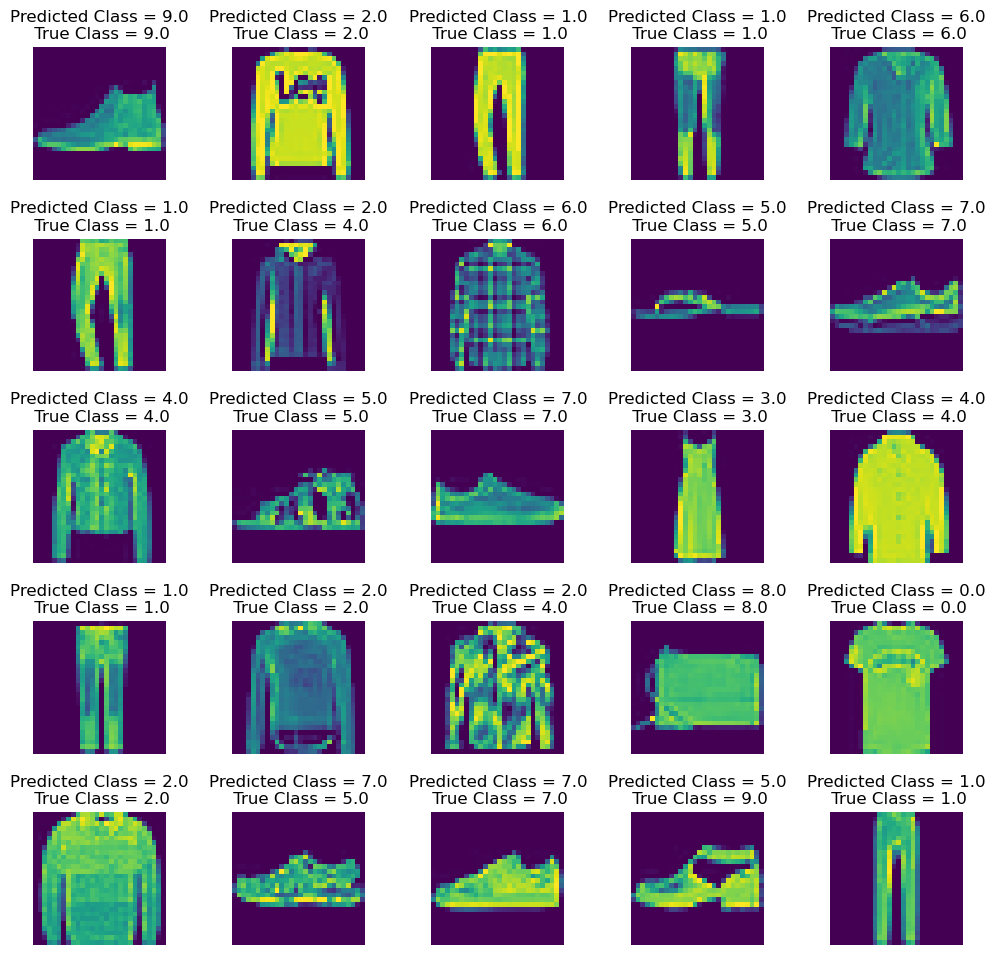

In [37]:
# Define the number of rows and columns in the subplot grid
L = 5
W = 5

# Create a subplot grid with L rows and W columns and set the figure size
fig, axes = plt.subplots(L, W, figsize=(12, 12))

# Flatten the axes array to easily iterate through the subplots
axes = axes.ravel()

# Iterate through the L * W subplots
for i in np.arange(0, L * W):
    # Display the image for the ith test sample (X_test[i]) in the subplot
    axes[i].imshow(X_test[i].reshape(28, 28))
    
    # Set the title of the subplot with the predicted class and true class information
    axes[i].set_title("Predicted Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    
    # Turn off axis ticks and labels for cleaner visualization
    axes[i].axis('off')

# Adjust the spacing between subplots to improve readability
plt.subplots_adjust(wspace=0.5)

<AxesSubplot:>

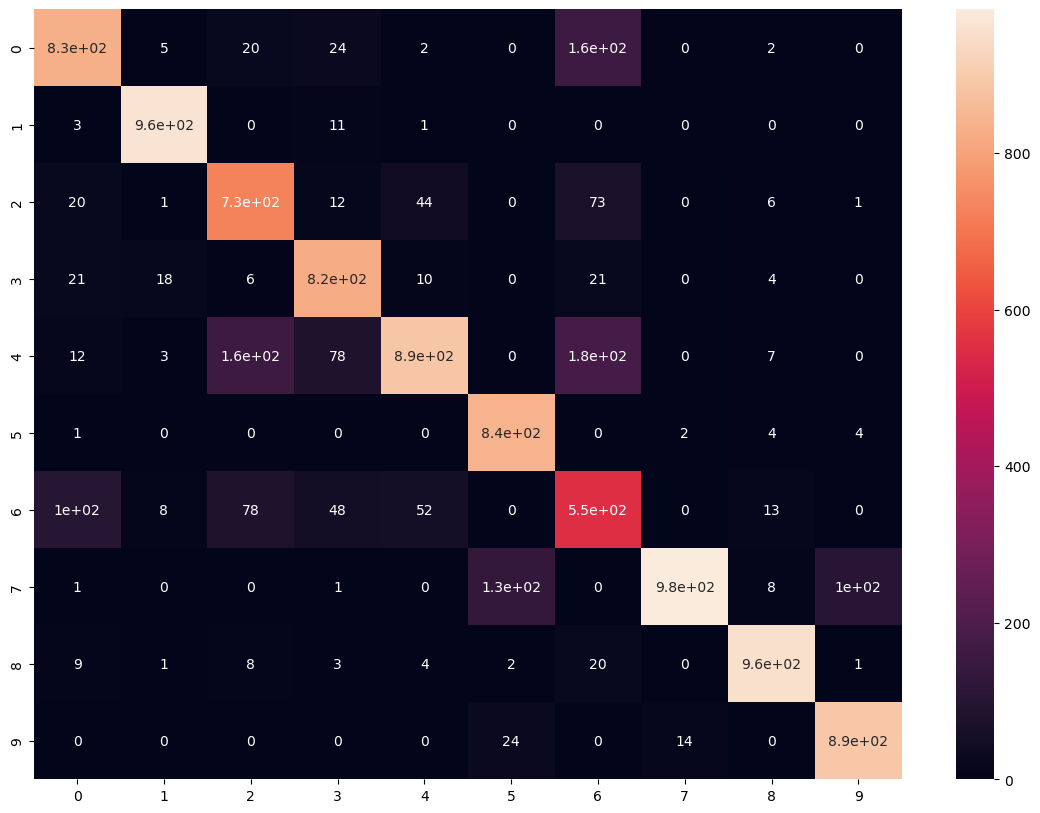

In [38]:
# Import the 'seaborn' library for data visualization and 'confusion_matrix' from 'sklearn.metrics'
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix between the predicted classes and the true classes
cm = confusion_matrix(predicted_classes, y_test)

# Create a figure with a heatmap to visualize the confusion matrix
plt.figure(figsize=(14, 10))

# Plot the confusion matrix as a heatmap with annotations
sns.heatmap(cm, annot=True)

In [39]:
# Import the 'classification_report' function from 'sklearn.metrics'
from sklearn.metrics import classification_report

# Define the total number of classes in the classification problem (10 in this case)
num_classes = 10

# Create a list of target names for each class using a list comprehension
target_names = ['class {}'.format(i) for i in range(num_classes)]

# Generate and print the classification report based on the true labels (y_test) and the predicted labels (predicted_classes)
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.82      0.73      0.77      1000
           3       0.91      0.82      0.86      1000
           4       0.67      0.89      0.76      1000
           5       0.99      0.84      0.91      1000
           6       0.65      0.55      0.60      1000
           7       0.80      0.98      0.88      1000
           8       0.95      0.96      0.95      1000
           9       0.96      0.89      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



Explanation:

 - `precision`: Precision is a metric that measures the accuracy of positive predictions. For each class, it is calculated as the ratio of true positive predictions to the sum of true positive and false positive predictions. Higher precision values indicate fewer false positives.

- `recall`: Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify positive samples. It is calculated as the ratio of true positive predictions to the sum of true positive and false negative predictions. Higher recall values indicate fewer false negatives.

- `f1-score`: The F1-score is the harmonic mean of precision and recall. It provides a balance between the two metrics and is particularly useful when there is an imbalance between classes. It ranges from 0 to 1, where 1 represents the best possible score.

- `support`: The support represents the number of samples in each class in the test dataset.

The classification report displays these metrics for each class (0 to 9 in this case). For example, for class 0, the precision is 0.80, the recall is 0.83, and the F1-score is 0.82. The support for class 0 is 1000, indicating that there are 1000 samples in the test dataset belonging to class 0.

The `accuracy` row provides the overall accuracy of the model on the test dataset, which is calculated as the fraction of correctly predicted samples out of the total number of samples (10000 in this case).

In this particular fashion classification project, the overall accuracy is reported as approximately 0.85 (85%). An accuracy of 85% means that the model correctly predicts the class labels for 85% of the samples in the test dataset.

The `macro avg` row calculates the average of precision, recall, and F1-score across all classes, giving equal weight to each class regardless of its size.

The `weighted avg` row calculates the weighted average of precision, recall, and F1-score, taking into account the number of samples in each class, giving higher weight to classes with more samples.

Overall, the classification report provides a comprehensive overview of the model's performance, highlighting its strengths and weaknesses in classifying different fashion items. It is a valuable tool for evaluating and fine-tuning the model to achieve better results.

## Conclusion

In this fashion classification project, we created a Convolutional Neural Network (CNN) to accurately classify different fashion items based on images. The model demonstrated satisfactory performance, achieving an accuracy of approximately 88.41% on the training data and around 84.55% on the test data. By converting the predicted class probabilities to class labels, we were able to compare the model's predictions with the ground truth labels and assess its performance on unseen data.

While the model showcased promising results, further improvements can be pursued through hyperparameter tuning, exploring different architectures, data augmentation techniques, or leveraging transfer learning. Analyzing misclassifications and gaining insights into the model's predictions could provide valuable guidance for enhancing its performance. Overall, this project highlights the potential of deep learning in fashion classification and opens avenues for refining the model to achieve even better results in practical applications within the fashion industry or related domains.